## KNeighborsClassifier (K-NN) | Full Case-Study (Social Media Advertising) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Import Dataset

In [3]:
ads = pd.read_csv(r'G:\Udemy Courses Files\Python Machine Learning Diploma\5-Supervised classification\datasets\social-network-ads.csv')
ads

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


#### Extracting Features

In [4]:
X = ads.iloc[:, :-1].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [5]:
y = ads.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

#### Data Splitting and Pre-processing

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# No need for standardization of y since it is already binary (0 or 1)

In [8]:
X_train

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926],
       [-0.56234321,  2.33980255],
       [ 1.0088136 , -1.19473064],
       [-0.75873781,  1.08372877],
       [ 2.1871812 , -1.04867555],
       [ 0.0268406 , -0.25997806],
       [-0.46414591, -1.1363086 ],
       [ 0.1250379 ,  0.03213212],
       [ 1.6961947 , -0.90262046],
       [ 1.1070109 , -0.90262046],
       [ 0.5178271 ,  1.22978386],
       [-1.05332971, -1.4576298 ],
       [-1.15152701, -1.54526286],
       [-0.0713567 ,  0.67477452],
       [ 0.4196298 , -0.46445519],
       [-0.2677513 , -0.25997806],
       [-0.85693511,  0.14897619],
       [ 0.0268406 ,  0.29503128],
       [ 0.7142217 , -1.28236369],
       [ 1.5979974 ,  1.11293979],
       [ 0.812419  , -1.36999675],
       [-1.44611891, -1.22394166],
       [-0.0713567 ,  0.14897619],
       [ 0.4196298 , -0.14313399],
       [-0.2677513 ,

In [9]:
X_test

array([[ 0.812419  , -1.39920777],
       [ 2.0889839 ,  0.52871943],
       [-0.95513241, -0.75656537],
       [ 1.0088136 ,  0.76240757],
       [-0.85693511, -1.22394166],
       [-0.75873781, -0.23076704],
       [ 0.9106163 ,  1.08372877],
       [-0.85693511,  0.38266434],
       [ 0.2232352 ,  0.14897619],
       [ 0.4196298 , -0.14313399],
       [-0.2677513 , -0.14313399],
       [ 1.4998001 , -1.04867555],
       [-1.44611891, -0.6397213 ],
       [-1.74071081, -1.36999675],
       [-0.75873781,  0.49950841],
       [-0.2677513 ,  1.11293979],
       [ 1.4016028 , -0.93183148],
       [ 0.812419  ,  0.11976517],
       [ 0.1250379 , -0.8149874 ],
       [ 1.794392  , -0.28918908],
       [-1.54431621, -1.25315268],
       [-0.85693511,  0.29503128],
       [ 0.9106163 , -1.36999675],
       [ 2.0889839 ,  0.17818721],
       [-1.83890811, -1.48684082],
       [ 1.3034055 , -1.36999675],
       [ 0.4196298 ,  0.29503128],
       [-0.0713567 , -0.49366621],
       [ 1.6961947 ,

In [10]:
y_train

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], d

In [11]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

#### Model Training and Prediction

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

p:float, default=2
Power parameter for the Minkowski metric.
=> When p = 1, this is equivalent to using manhattan_distance (l1), 
=> When p = 2, this is equivalent to using euclidean_distance (l2) For arbitrary p, minkowski_distance (l_p) is used.

metric:str or callable, default=’minkowski’
Metric to use for distance computation. 
Default is “minkowski”, which results in the standard Euclidean distance when p = 2

In [14]:
classifier.predict(sc.fit_transform([[30, 87000]]))

array([0], dtype=int64)

In [13]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [15]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

#### Model Evaluation

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('\n')
print('classification report: \n',classification_report(y_test, y_pred))


Confusion matrix:
 [[59  4]
 [ 3 34]]
Accuracy Score:  0.93


classification report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.89      0.92      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



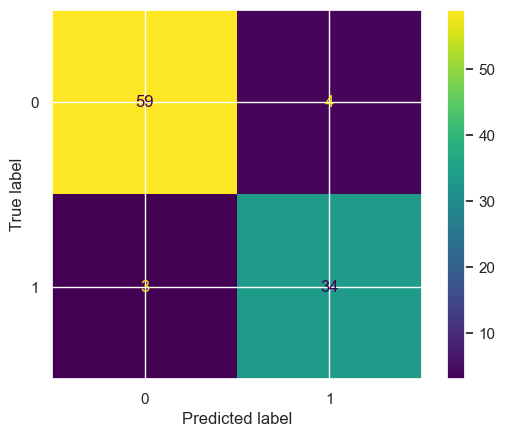

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### Choosing Best Value of 'K'

In [39]:
test_error_rate = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, pred_i)
    test_error_rate.append(test_error)

test_error_rate 

[0.15000000000000002,
 0.15000000000000002,
 0.07999999999999996,
 0.09999999999999998,
 0.06999999999999995,
 0.07999999999999996,
 0.06999999999999995,
 0.06999999999999995,
 0.06000000000000005,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06000000000000005,
 0.06000000000000005,
 0.06000000000000005,
 0.06000000000000005,
 0.06999999999999995,
 0.06000000000000005,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995]

Text(0, 0.5, 'Error Rate')

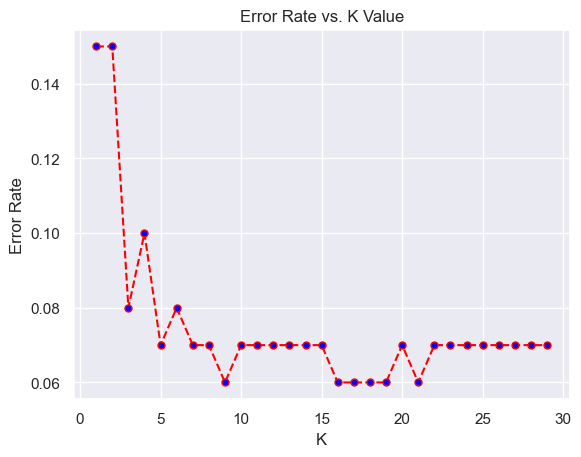

In [40]:
plt.Figure(figsize = (15, 5))
plt.plot(range(1, 30), test_error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


The min Error Rate @ K neighbors = 9

#### Re-Modeling 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('\n')
print('classification report: \n',classification_report(y_test, y_pred))


Confusion matrix:
 [[58  5]
 [ 1 36]]
Accuracy Score:  0.94


classification report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100

